<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature scaling and Learning Rate (Multi-variable)**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy
np.set_printoptions(precision = 2)

******
**Load data from drive**

In [37]:
def load_data():
  data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datas/houses.txt", delimiter = ',')
  x = data[1:, :4]  # Select all the rows (except the first) and first 4 columns
  y = data[1:, 4]   # Select all the target values (5tyh column).
  return x, y

  #return data, x, y
#data, x, y = load_data()
# print(data[:3])
# print(x[:3, :])
# print(y[:10])
# print(x.shape, y.shape)

In [38]:
# Load the Dataset
X_train, y_train = load_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [39]:
print(X_train.shape[0])

99


******
**view the dataset and its features by plotting each features versus price.**

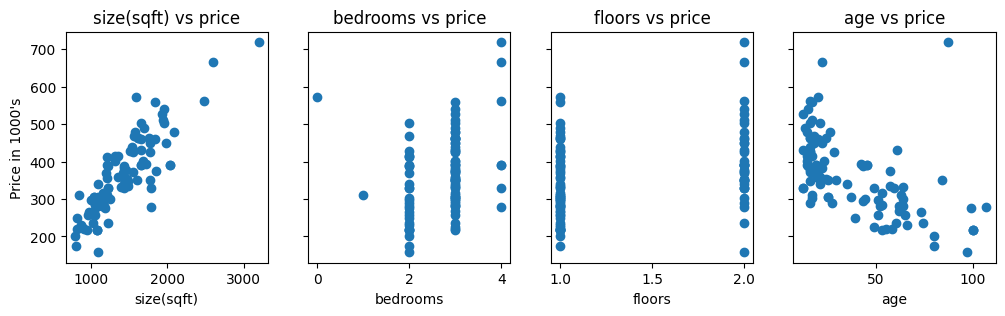

In [40]:
# view the dataset and its features by plotting each features versus price.
fig, ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
  ax[i].scatter(X_train[:, i], y_train)
  ax[i].set_xlabel(X_features[i])
  ax[i].set_title(f"{X_features[i]} vs price")
ax[0].set_ylabel("Price in 1000's")
plt.show()

******
**Implementing Gradient calculation function**

In [41]:
def compute_gradient(X_train, y_train, w, b):
  """
  Compute the cost (mean squared error) for linear regression.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w (numpy array): The weight vector of shape (n, ).
    b (scalar): The bias term for the model.
  Retuns:
    dj_db (scalar): The gradient of the cost function with respect to the bias term 'b'.
    dj_dw (numpy array): The gradient of the cost function with respect to the weight vector 'w', of shape (n, ).
  """
  m, _ = X_train.shape
  f_wb = np.dot(X_train, w) + b
  e = f_wb - y_train

  dj_dw = (1/m) * np.dot(X_train.T, e)
  dj_db = (1/m) * np.sum(e)
  return dj_db, dj_dw



******
**Implementing Cost function**

In [42]:
def compute_cost(X_train, y_train, w, b):
  """
  Compute the cost (mean squared error) for linear regression.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w (numpy array): The weight vector of shape (n, ).
    b (scalar): The bias term for the model.
  Retuns:
    cost (scalar): The cost (mean squared error) of the current model parameters (w, b).
  """
  m = X_train.shape[0]  # Get the number of training examples from the shape of the input matrix
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X_train[i], w) + b  # Calculate the predicted value for the i-th example
    cost = cost + (f_wb_i - y_train[i])**2  # Accumulate the squared difference between predicted and actual values

  cost = cost/(2*m)   # Compute the mean squared error by dividing 2m
  return (np.squeeze(cost))

******
**Implementing Gradient Descent function**

In [43]:
def gradient_descent(X_train, y_train, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
  """
  Performs gradient descent to optimize the parameters for a linear regression model based on multiple features.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w_init (numpy array): Initial values of the weights (parameters) of shape (n, )
    b_init (float): Initial bias term (intercept)
    cost_function (function): Function to compute the cost.
    gradient_function (function): Function to compute gradients of the cost function
    alpha (float): Learning rate for gradient descent.
    num_iters (int): Number of iterations to run gradient descent.

  Returns:
    w (numpy array): Final optimized weights after gradient descent.
    b (float): Final optimized bias term after gradient descent.
    J_hist (dict): Dictionary containing the history of cost, parameters, gradients, and iteration steps during the optimization process.
        - 'cost': List of cost values at specific intervals.
        - 'params': List of weight and bias values at specific intervals.
        - 'grads': List of gradients for weights and bias at specific intervals.
        - 'iter': List of iteration numbers corresponding to the saved data.
  """
  m = len(X_train)  # Get the number of training example.

  J_hist = {} # Initialize a dictionary to store history.
  J_hist['cost'] = []
  J_hist['params'] = []
  J_hist['grads'] = []
  J_hist['iter'] = []

  w = copy.deepcopy(w_init)   # Create a deep copy of the initial weights to avoid modifying the original one
  b = b_init
  save_interval = np.ceil(num_iters/1000) # prevent resource exhaustion for long runs

  print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
  print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

  for i in range(num_iters):  # Loop for the specified number of iterations.
    dj_db, dj_dw = gradient_function(X_train, y_train, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i == 0 or i %save_interval == 0: # Check if it's the first iteration or if it's time to save data
      J_hist['cost'].append(cost_function(X_train, y_train, w, b))
      J_hist['params'].append([w, b])
      J_hist['grads'].append([dj_dw, dj_db])
      J_hist['iter'].append(i)

    if i %math.ceil(num_iters/10) == 0: # Print progress at every 10% of iteration
      cost = cost_function(X_train, y_train, w, b)  # Calculate current cost
      print(f"{i:9d} {cost:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")

  return w, b, J_hist

In [44]:
def run_gradient_descent(X_train, y_train, num_iters, alpha):
  """
  Performs gradient descent operation.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    num_iters (int): Number of iterations to run gradient descent.
    alpha (float): Learning rate for gradient descent.

  Returns:
    w_final (numpy array): Final optimized weights after gradient descent.
    b_final (float): Final optimized bias term after gradient descent.
    J_hist (dict): Dictionary containing the history of cost, parameters, gradients, and iteration steps during the optimization process.
  """
  _, n = X_train.shape  # Get the number of features for the shape of the input matrix

  w_init = np.zeros(n)
  b_init = 0

  w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)

  print(f"Final w and b found by the gradient descent w: {w_final}, b: {b_final:0.2f}")

  return w_final, b_final, J_hist

******
**Implementing Graph Plotting function to plot cost vs iteration and cost vs the first weight parameter**

In [45]:
def plot_cost_i_w(X_train, y_trin, J_hist):
  """
  Plot the cost vs itertion and cost vs the first weight parameter (w[0]) based on the history of gradient descent.

  Args:
    X_train (numpy array): The input features matrix.
    y_train (numpy array): The target/output values.
    J_hist (dict): A dictionary containing the history of parameters, cost, and iterations from gradient descent.
  """
  ws = np.array([p[0] for p in J_hist['params']])   # Extract the first weight (w[0]) from the history of parameters
  rng = max(abs(ws[:, 0].min()), abs(ws[:, 0].max()))   # Calculate the range of w[0] values (maximum absolute value of w[0])
  wr = np.linspace(-rng + 0.27, rng + 0.27, 20)   # Create a range of w[0] values from -rng to rng with 20 points.
  cst = [compute_cost(X_train, y_train, np.array([wr[i], -32,-67, -1.46]), 211) for i in range(len(wr))]   #   Compute the cost for each w[0] value in the range, keeping other weights fixed

  fig, ax = plt.subplots(1, 2, figsize=(12, 3))

  # Plot cost vs iteration (from gradient descent history)
  ax[0].plot(J_hist['iter'], J_hist['cost'])
  ax[0].set_title("Cost vs Iteration")
  ax[0].set_xlabel("Iteration")
  ax[0].set_ylabel("Cost")

  # Plot cost vs w[0] (computed cost for different values of w[0])
  ax[1].plot(wr, cst)
  ax[1].set_title("Cost vs w[0]")
  ax[1].set_xlabel("w[0]")
  ax[1].set_ylabel("Cost")

  ax[1].plot(ws[:, 0], J_hist["cost"])  # Plot the actual w[0] values from gradient descent history on the cost vs w[0] plot

  plt.show()

In [99]:
from scipy.stats import norm
def norm_plot(ax, data):
  scale = (np.max(data) - np.min(data))*0.2
  x = np.linspace(np.min(data) - scale, np.max(data) + scale, 50)
  _, bins, _ = ax.hist(data, x, color = 'xkcd:azure')
  # ax.set_ylabel("Count")

  mu = np.mean(data)
  std = np.std(data)
  dist = norm.pdf(bins, loc=mu, scale=std)

  axr = ax.twinx()
  axr.plot(bins, dist, color = 'orangered', lw = 2)
  axr.set_ylim(bottom = 0)
  axr.axis('off')

******
**Implement for different Learning Rate (Alpha)**

In [46]:
# set alpha to 9.9e-7
# 10 iterations
_, _, J_hist = run_gradient_descent(X_train, y_train, 10, 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

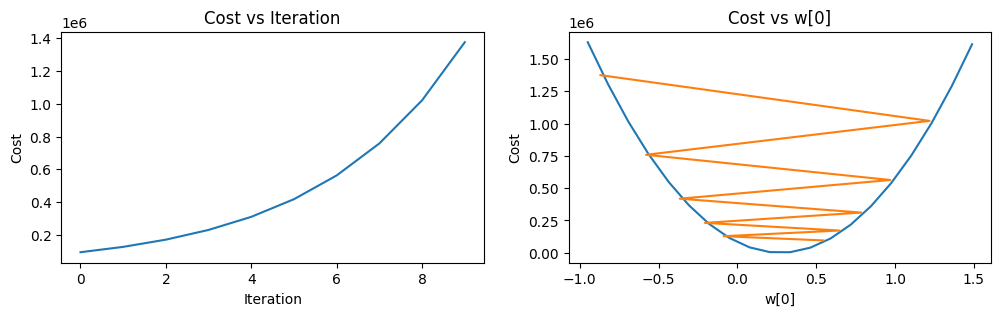

In [47]:
plot_cost_i_w(X_train, y_train, J_hist)

In [48]:
# set alpha to 9e-7
# 10 iterations
_, _, J_hist = run_gradient_descent(X_train, y_train, 10, 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

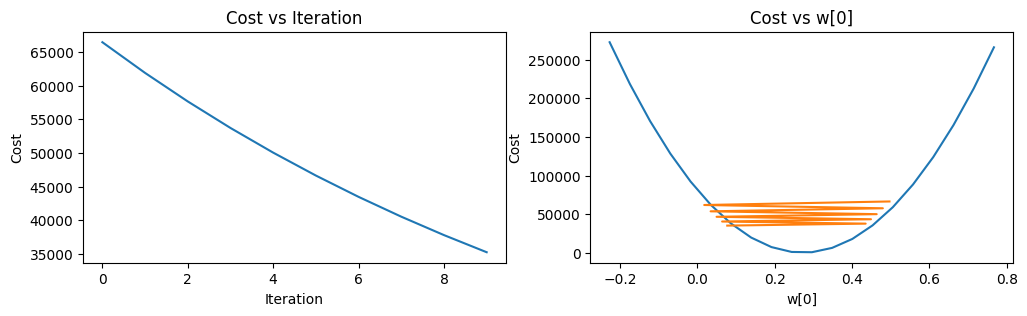

In [49]:
plot_cost_i_w(X_train, y_train, J_hist)

In [50]:
# set alpha to 1e-7
# 10 iterations
_, _, J_hist = run_gradient_descent(X_train, y_train, 10, 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

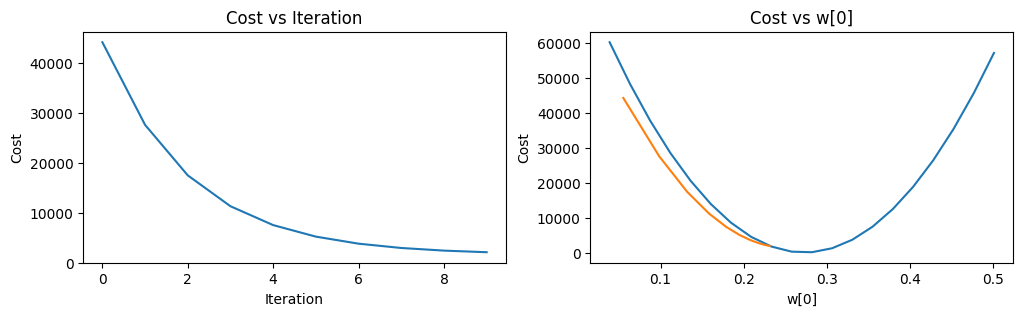

In [51]:
plot_cost_i_w(X_train, y_train, J_hist)

******
**Feature Scaling Start**

In [52]:
def zscore_normalize_features(X_train):
  """
  computes X_train, zscore normalized by column

  Args:
    X_train (ndarray (m, n)): Input data, m examples, n features
  Returns:
    X_norm (ndarray(m, n)): Input normalized by column
    mu (ndarray(n, )): mean of each features
    sigma (ndarray(, n)): Standard devaiation of each features.
  """
  mu = np.mean(X_train, axis = 0) # find the mean of each features
  sigma = np.std(X_train, axis = 0) # find the standard deviation of each features
  X_norm = (X_train - mu) / sigma # element-wise, subtract mu for that features from each example, divided by standard deviation

  return X_norm, mu, sigma

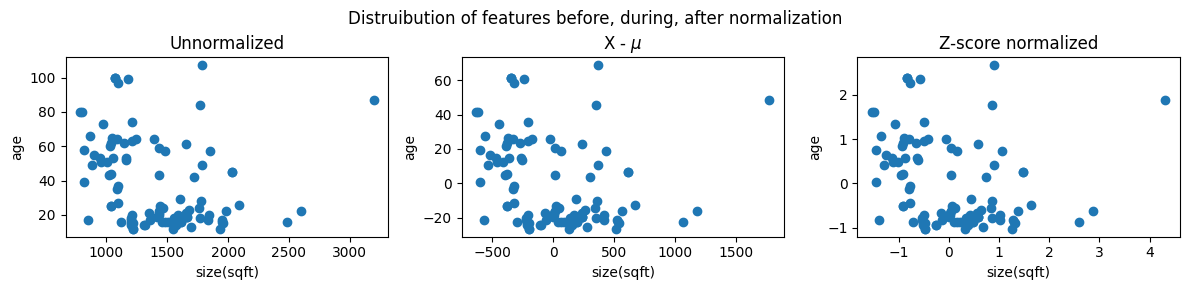

In [81]:
mu = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)
X_mean = (X_train - mu)
X_norm = X_mean / sigma

fig, ax=plt.subplots(1,3, figsize = (12, 3))
ax[0].scatter(X_train[:,0], X_train[:, 3])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[0].set_title("Unnormalized")
#ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:, 3])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[3])
ax[1].set_title("X - $\mu$")
#ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:, 3])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[3])
ax[2].set_title("Z-score normalized")
#ax[2].axis('equal')

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
fig.suptitle("Distruibution of features before, during, after normalization")
plt.show()

In [89]:
X_norm, mu, sigma = zscore_normalize_features(X_train)
print("Mu:",mu)
print("Sigma:",sigma)
print(f"Peak to Peak range by column in Raw        X: {np.ptp(X_train, axis = 0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis = 0)}")

Mu: [1.42e+03 2.72e+00 1.38e+00 3.84e+01]
Sigma: [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


In [90]:
X_norm[:6]

array([[-0.42,  0.43, -0.79,  0.99],
       [ 1.28,  0.43,  1.27, -0.83],
       [ 0.74,  0.43,  1.27,  0.14],
       [ 1.31,  0.43,  1.27, -0.91],
       [-0.25, -1.1 , -0.79, -0.95],
       [-1.35, -1.1 , -0.79,  1.07]])

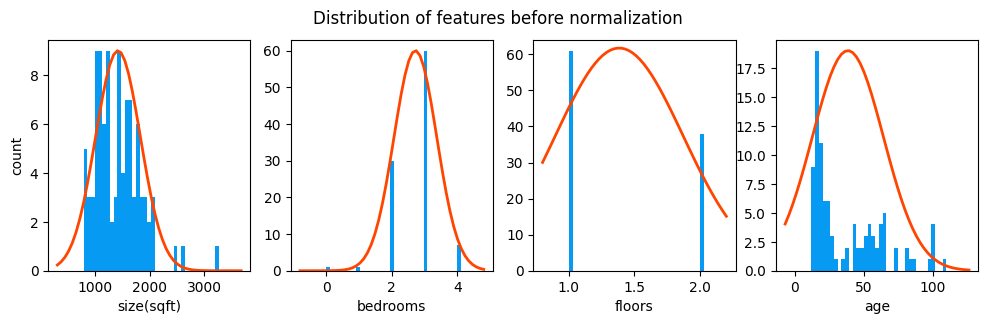

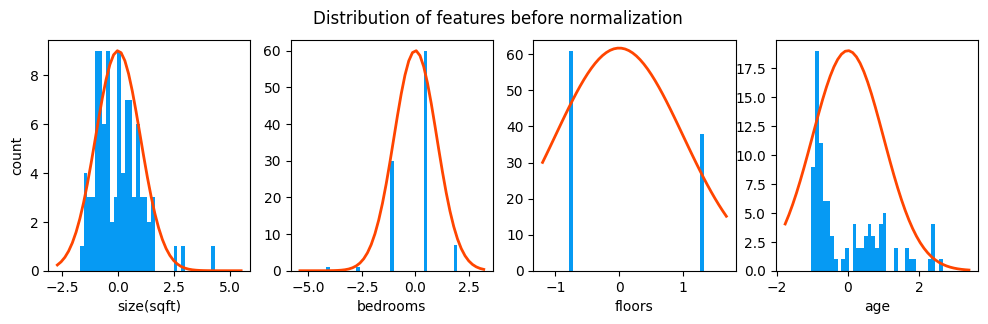

In [106]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
  norm_plot(ax[i], X_train[:, i],)
  ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("Distribution of features before normalization")
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
  norm_plot(ax[i], X_norm[:, i],)
  ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("Distribution of features before normalization")
plt.show()

In [107]:
w_norm, b_norm, j_hist = run_gradient_descent(X_norm, y_train, 1000,1.0e-1)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

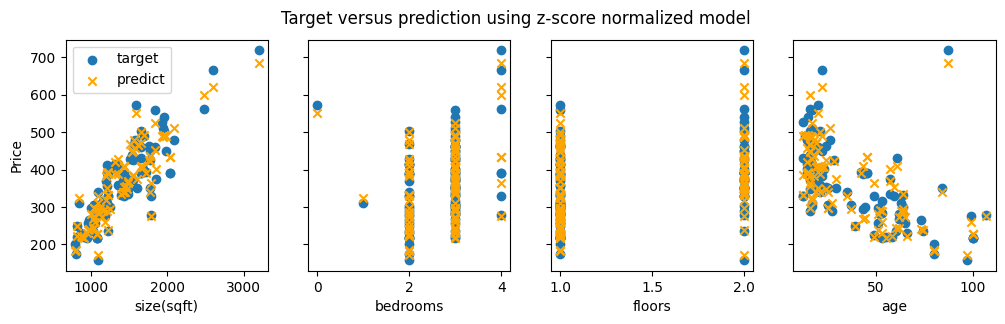

In [120]:
# predict the target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
  yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# plot predictions and target versus original features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey = True)
for i in range(len(ax)):
  ax[i].scatter(X_train[:, i], y_train, label = 'target')
  ax[i].set_xlabel(X_features[i])
  ax[i].scatter(X_train[:, i], yp, marker='x', color='orange', label = 'predict')

  sorted_idx = np.argsort(X_train[:, i]) # sort the values for a clean line plot

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()

******
**Predicted price for new data**

In [123]:
# predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - mu) / sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f'Predicted the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old is: ${x_house_predict * 1000:0.0f}')

[-0.53  0.43 -0.79  0.06]
Predicted the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old is: $318709
